# Transfer Learning InceptionV3 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### Importing the libraries

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input, InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
# Re-sizing all the Images 
IMAGE_SIZE = [224, 224]

train_path = "D:\\College\\cotton\\train"
valid_path = "D:\\College\\cotton\\validation"
test_path = "D:\\College\\cotton\\test"

In [3]:
# Here we will be using imagenet weights

inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in inceptionv3.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('D:\\College\\cotton\\train\\*')

In [6]:
# Flatten the input
x = Flatten()(inceptionv3.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs = inceptionv3.input, outputs=prediction)

In [8]:
# Model Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [9]:
# Compile the Model
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)



test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1203 images belonging to 4 classes.


In [12]:
validation_set = validation_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 253 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 253 images belonging to 4 classes.


In [14]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [15]:
training_set.classes

array([0, 0, 0, ..., 3, 3, 3])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 3)

In [18]:
# Fit the model
model.fit(training_set, 
          validation_data=validation_set, 
          epochs=30, 
          steps_per_epoch=len(training_set), 
          validation_steps=len(validation_set), 
          batch_size = 32)

Epoch 1/30
38/38 [==============================] - 42s 1s/step - loss: 5.1622 - accuracy: 0.6027 - val_loss: 1.2608 - val_accuracy: 0.7787
Epoch 2/30
38/38 [==============================] - 43s 1s/step - loss: 1.0021 - accuracy: 0.8446 - val_loss: 0.7379 - val_accuracy: 0.8419
Epoch 3/30
38/38 [==============================] - 48s 1s/step - loss: 0.8674 - accuracy: 0.8545 - val_loss: 0.4683 - val_accuracy: 0.8775
Epoch 4/30
38/38 [==============================] - 46s 1s/step - loss: 0.8937 - accuracy: 0.8653 - val_loss: 0.7792 - val_accuracy: 0.8854
Epoch 5/30
38/38 [==============================] - 49s 1s/step - loss: 0.4911 - accuracy: 0.9069 - val_loss: 0.3268 - val_accuracy: 0.9368
Epoch 6/30
38/38 [==============================] - 47s 1s/step - loss: 0.3910 - accuracy: 0.9293 - val_loss: 0.5132 - val_accuracy: 0.9130
Epoch 7/30
38/38 [==============================] - 50s 1s/step - loss: 0.4006 - accuracy: 0.9194 - val_loss: 0.7463 - val_accuracy: 0.8775
Epoch 8/30
38/38 [==

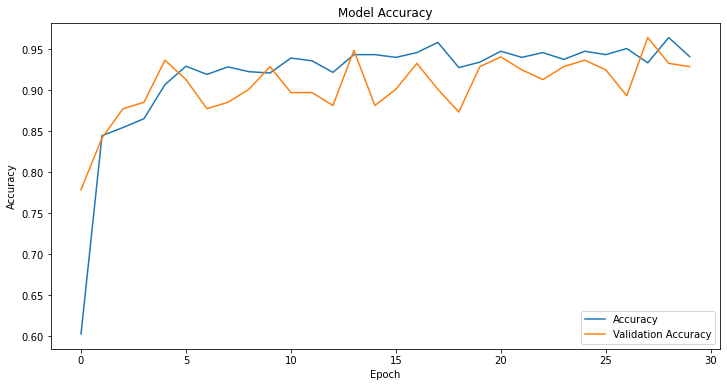

In [19]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
# plt.plot(model.history.history['loss'])
# plt.plot(model.history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

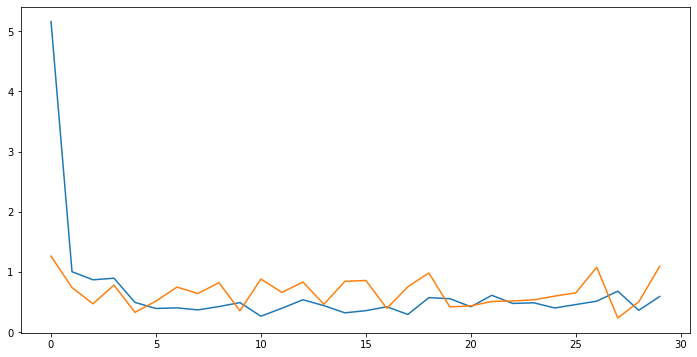

In [20]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [22]:
#Save the model as h5 file
from tensorflow.keras.models import load_model
model.save('model_inceptionv3_multiclass.h5')

# **Testing**

### Example 1

1/1 [==============================] - 1s 913ms/step


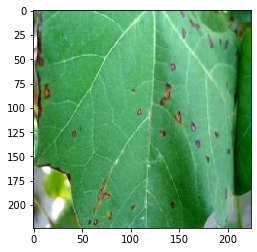

In [23]:
#Example 1

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("D:\\College\\cotton\\bacterial-blight.png", target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [24]:
preds

array([[1.0000000e+00, 3.1335806e-10, 1.8914254e-27, 4.4327116e-08]],
      dtype=float32)

In [25]:
training_set.class_indices

{'bacterial_blight': 0, 'curl_virus': 1, 'fussarium_wilt': 2, 'healthy': 3}

In [26]:
preds = np.argmax(preds, axis=1)

In [27]:
if preds==0:
  print("It is bacterial blight")
elif preds==1:
  print("It is curl virus")
elif preds==2:
  print("It is fussarium wilt")
else:
  print("It is a healthy plant")

It is bacterial blight


### Example 2

1/1 [==============================] - 0s 49ms/step


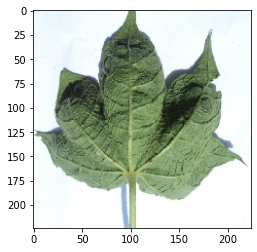

In [28]:
#Example 2

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("D:\\College\\cotton\\curl.png" , target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [29]:
preds

array([[1.74868503e-31, 1.00000000e+00, 1.03499286e-35, 1.75919518e-32]],
      dtype=float32)

In [30]:
preds = np.argmax(preds, axis=1)

In [31]:
if preds==0:
  print("It is bacterial blight")
elif preds==1:
  print("It is curl virus")
elif preds==2:
  print("It is fussarium wilt")
else:
  print("It is a healthy plant")

It is curl virus


In [32]:
test_predictions = model.predict(test_set)

8/8 [==============================] - 6s 633ms/step


In [33]:
test_predictions

array([[1.0000000e+00, 0.0000000e+00, 1.5272750e-37, 0.0000000e+00],
       [1.0000000e+00, 5.4418661e-23, 1.6655468e-25, 9.9893340e-14],
       [1.0000000e+00, 0.0000000e+00, 3.9186055e-34, 8.9281798e-38],
       ...,
       [1.0511550e-28, 8.9035466e-25, 1.5367784e-21, 1.0000000e+00],
       [6.0786840e-12, 5.8566129e-13, 3.1967414e-23, 1.0000000e+00],
       [1.7668235e-15, 1.1961188e-13, 2.0028644e-26, 1.0000000e+00]],
      dtype=float32)

In [34]:
test_labels = test_set.classes

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [36]:
confusion_matrix(test_labels, np.argmax(test_predictions, axis = 1))

array([[63,  2,  0,  0],
       [ 0, 62,  0,  0],
       [ 5,  8, 48,  1],
       [ 0,  0,  0, 64]], dtype=int64)

In [37]:
print(classification_report(test_labels, np.argmax(test_predictions, axis = 1)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        65
           1       0.86      1.00      0.93        62
           2       1.00      0.77      0.87        62
           3       0.98      1.00      0.99        64

    accuracy                           0.94       253
   macro avg       0.94      0.94      0.93       253
weighted avg       0.94      0.94      0.94       253

